In [2]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [6]:
stock = 'GOOGL';
globals()[stock] = pd.read_csv('GOOG.csv', index_col=0, usecols=['Close'])

In [7]:
GOOGL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-05-10,716.750000,723.500000,715.719971,723.179993,723.179993,1563100
2016-05-11,723.409973,724.479980,712.799988,715.289978,715.289978,1692100
2016-05-12,717.059998,719.250000,709.000000,713.309998,713.309998,1360700
2016-05-13,711.929993,716.661987,709.260010,710.830017,710.830017,1314500
2016-05-16,709.130005,718.479980,705.650024,716.489990,716.489990,1317100


In [9]:
# Summery stats for Apple Stock
GOOGL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,896.391919,903.100076,889.638753,896.743841,896.743841,1.581048e+06
std,129.394774,131.488578,127.237428,129.434756,129.434756,6.961474e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,5.370000e+05
25%,781.219971,785.929993,776.000000,782.520020,782.520020,1.155300e+06
50%,910.309998,919.244995,906.130005,911.710022,911.710022,1.372500e+06
75%,1013.659973,1024.229980,996.919983,1010.169983,1010.169983,1.784500e+06
max,1177.329956,1186.890015,1171.979980,1175.839966,1175.839966,5.167700e+06


In [10]:
GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 2016-05-10 to 2018-05-10
Data columns (total 6 columns):
Open         505 non-null float64
High         505 non-null float64
Low          505 non-null float64
Close        505 non-null float64
Adj Close    505 non-null float64
Volume       505 non-null int64
dtypes: float64(5), int64(1)
memory usage: 27.6+ KB


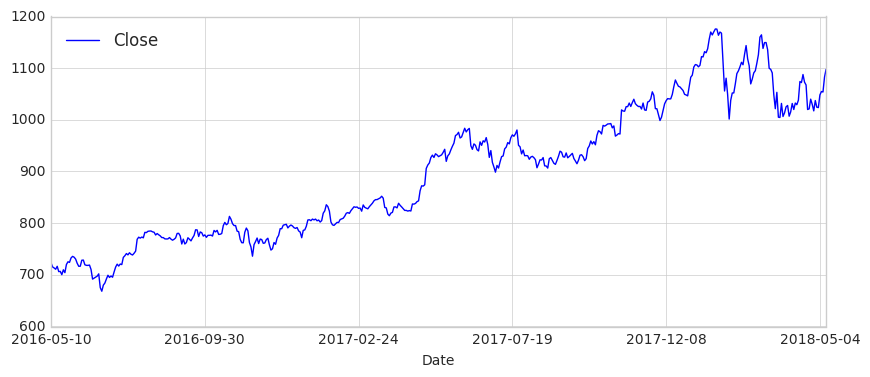

In [11]:
# Let's see a historical view of the closing price
GOOGL['Close'].plot(legend=True, figsize=(10,4))

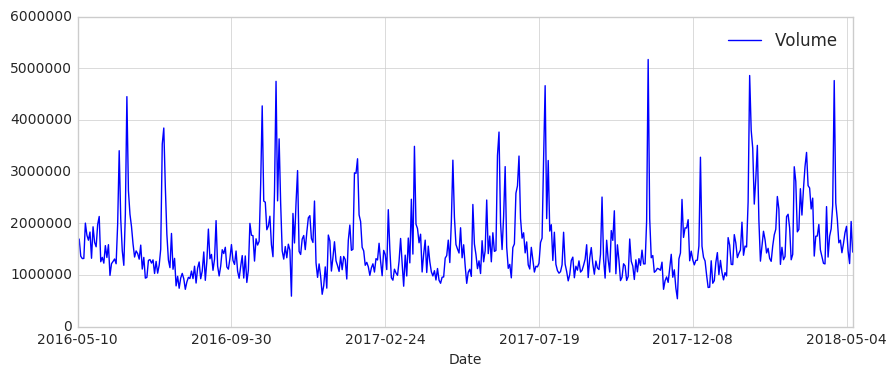

In [12]:
# Now let's plot the total volume of stock being traded each day over the past year

GOOGL['Volume'].plot(legend=True, figsize=(10,4))

In [13]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = GOOGL['Close'].dropna()

In [14]:
rets.quantile(0.05)

716.5019896

In [15]:
rets.head()

Date
2016-05-10    723.179993
2016-05-11    715.289978
2016-05-12    713.309998
2016-05-13    710.830017
2016-05-16    716.489990
Name: Close, dtype: float64

In [33]:
# make a new tech returns DataFrame# make  
tech_returns['GOOGLE'] = GOOGL['Close'].pct_change()

In [34]:
tech_returns.head()

Date
2016-05-10           NaN
2016-05-11    -0.0109102
2016-05-12   -0.00276808
2016-05-13   -0.00347672
2016-05-16    0.00796248
Name: Close, dtype: object

ValueError: Could not interpret input '1'

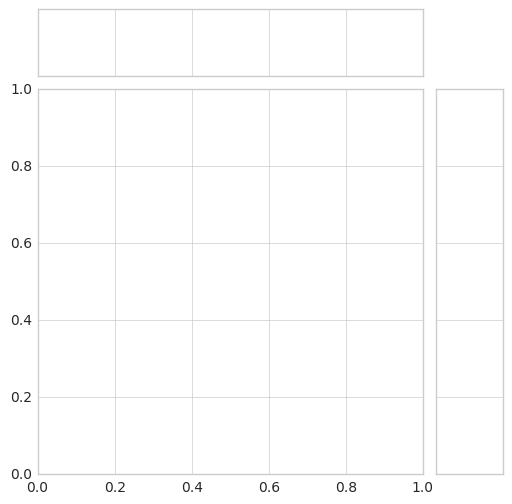

In [30]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('1','1',tech_returns,kind='scatter',color='orange')

In [42]:
closingprice_df = pd.read_csv('GOOG.csv', index_col=0, usecols=['Date','Close'])

In [38]:
closingprice_df.head()

,Close
Date,
2016-05-10,723.179993
2016-05-11,715.289978
2016-05-12,713.309998
2016-05-13,710.830017
2016-05-16,716.489990


In [43]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [44]:
tech_returns.head()

,Close
Date,
2016-05-10,NaN
2016-05-11,-0.010910
2016-05-12,-0.002768
2016-05-13,-0.003477
2016-05-16,0.007962


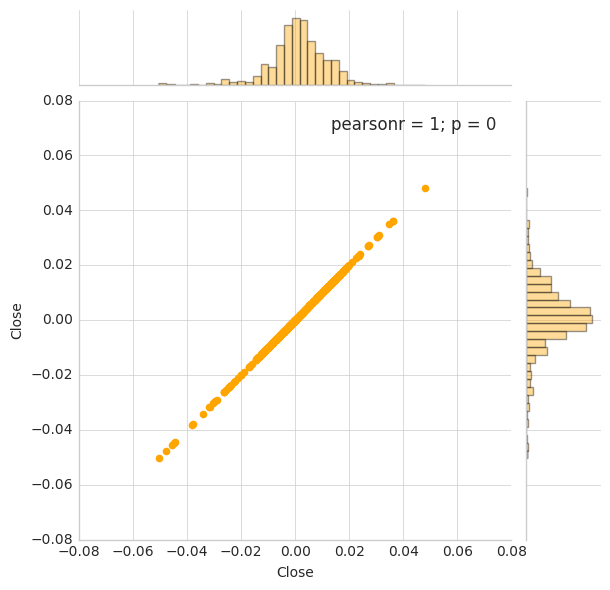

In [45]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('Close','Close',tech_returns,kind='scatter',color='orange')

In [70]:
GOOG_df = pd.read_csv('GOOG.csv', index_col=0, usecols=['Date','Close'])

In [71]:
AMZN_df = pd.read_csv('AMZN.csv', index_col=0, usecols=['Date','Close'])

In [72]:
MSFT_df = pd.read_csv('MSFT.csv', index_col=0, usecols=['Date','Close'])

In [73]:
MSFT_df.columns = ['MSFT'];

In [74]:
MSFT_df.head(2)

,MSFT
Date,
2016-05-10,51.020000
2016-05-11,51.049999


In [77]:
AMZN_df.columns = ['AMZN'];

In [78]:
GOOG_df.columns = ['GOOG'];

In [82]:
ret_df = pd.DataFrame()

In [83]:
ret_df = GOOG_df

In [84]:
ret_df.head(2)

,GOOG,AMZN
Date,,
2016-05-10,723.179993,703.070007
2016-05-11,715.289978,713.229980


In [85]:
GOOG_df['MSFT'] = MSFT_df;

In [86]:
ret_df = GOOG_df
ret_df.head(2)

,GOOG,AMZN,MSFT
Date,,,
2016-05-10,723.179993,703.070007,51.020000
2016-05-11,715.289978,713.229980,51.049999


In [87]:
# make a new tech returns DataFrame# make  
tech_returns = ret_df.pct_change()

In [88]:
tech_returns.head()

,GOOG,AMZN,MSFT
Date,,,
2016-05-10,NaN,NaN,NaN
2016-05-11,-0.010910,0.014451,0.000588
2016-05-12,-0.002768,0.006590,0.009011
2016-05-13,-0.003477,-0.011157,-0.008348
2016-05-16,0.007962,0.001042,0.014683


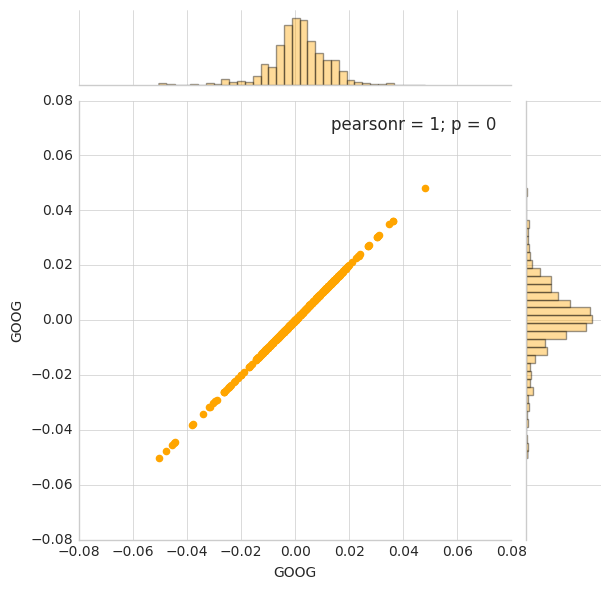

In [89]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_returns,kind='scatter',color='orange')

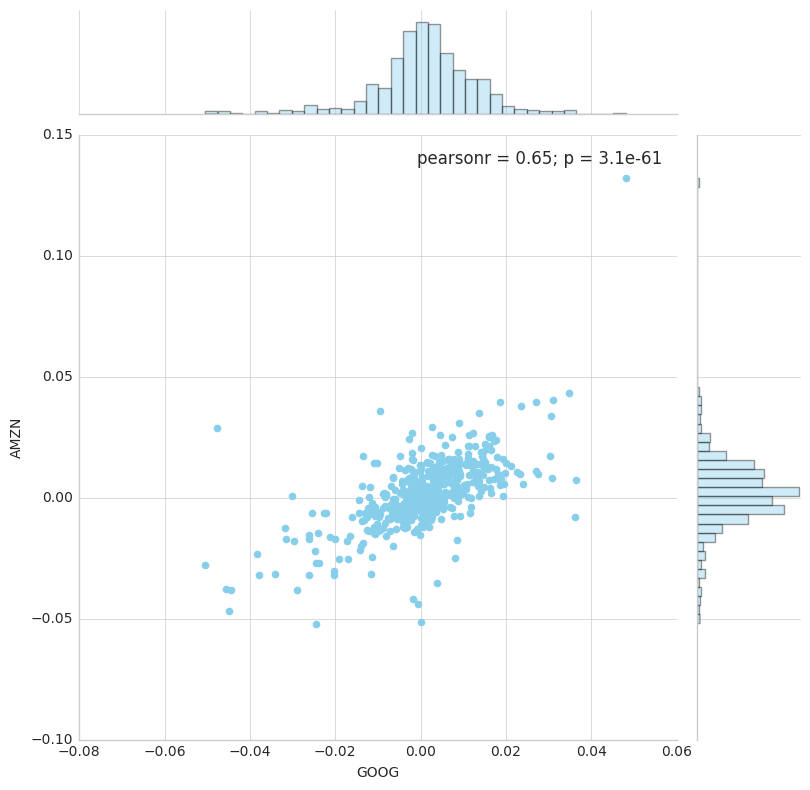

In [90]:
# We'll use joinplot to compare the daily returns of Google and Amazon.

sns.jointplot('GOOG','AMZN',tech_returns, kind='scatter',size=8, color='skyblue')

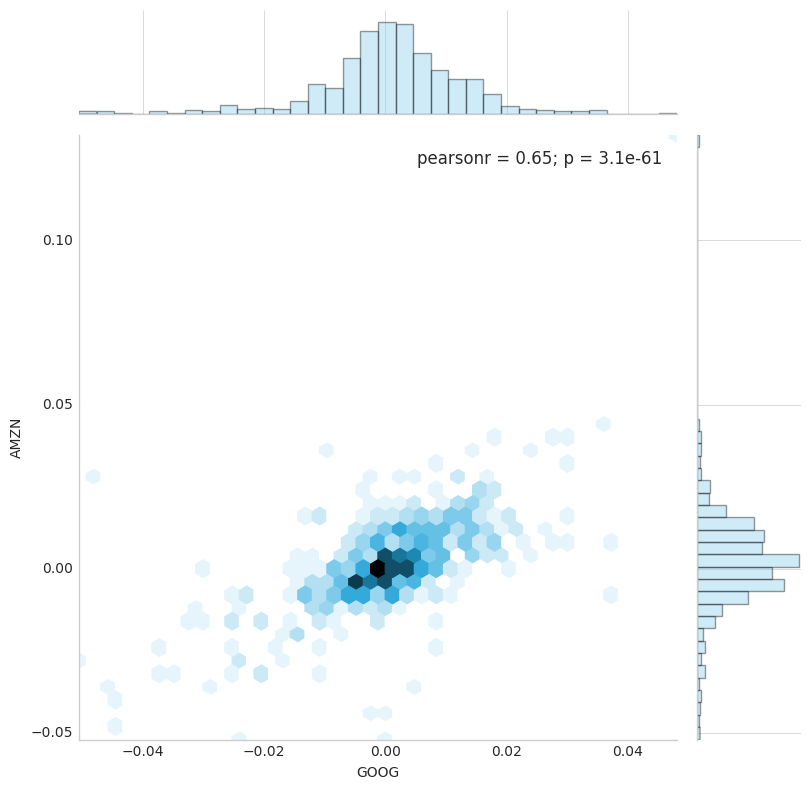

In [91]:
# with Hex plot
sns.jointplot('GOOG','AMZN',tech_returns, kind='hex',size=8, color='skyblue')

/home/muhammad/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


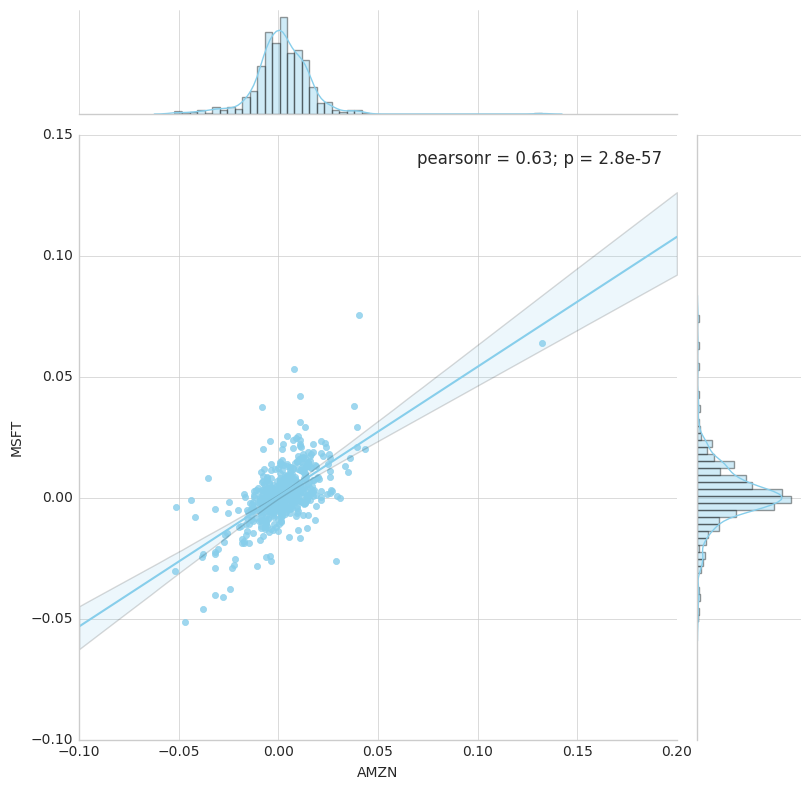

In [92]:
# Lets check out for Amazon and Microsoft with reg jointplot
sns.jointplot('AMZN','MSFT',tech_returns, kind='reg', size=8, color='skyblue')

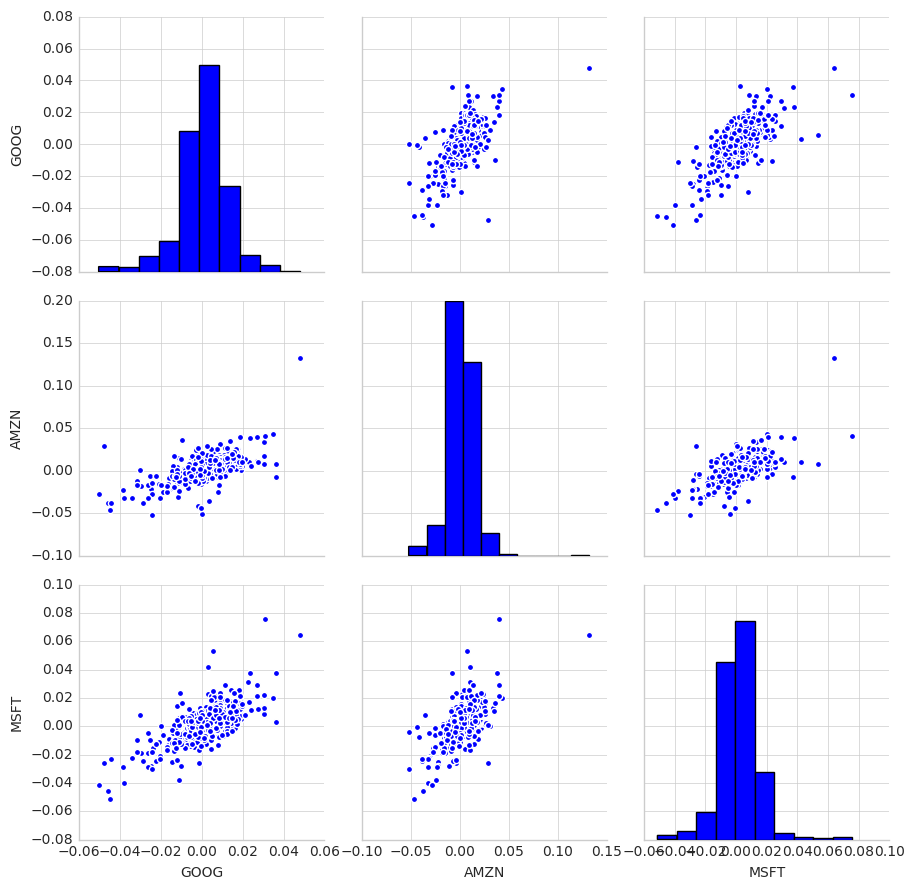

In [93]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

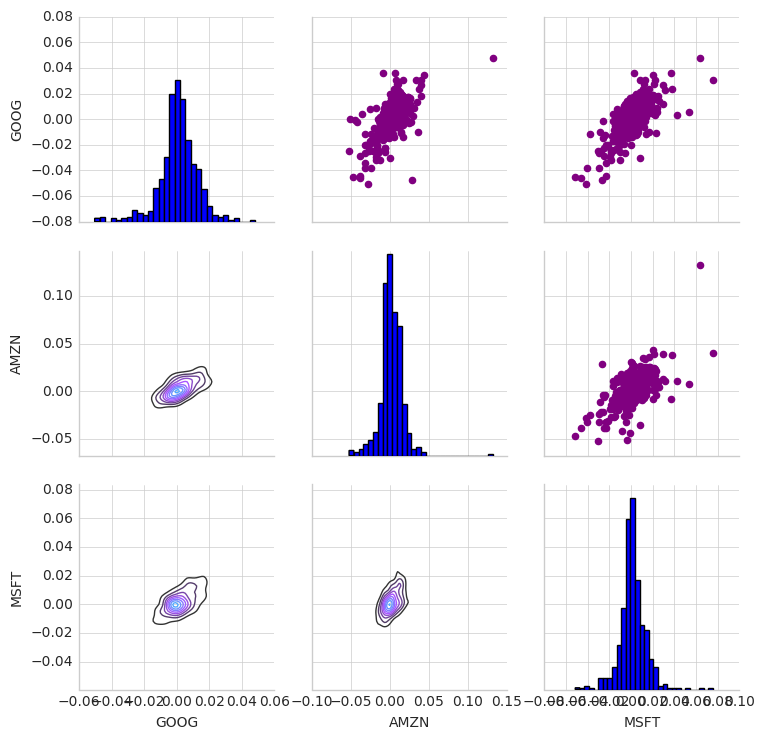

In [94]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

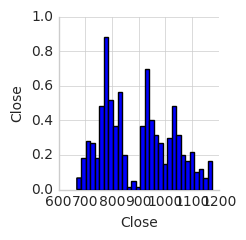

In [95]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

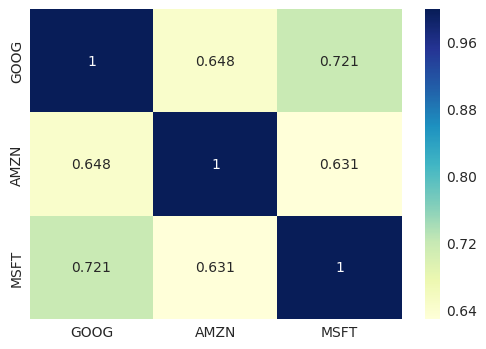

In [96]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

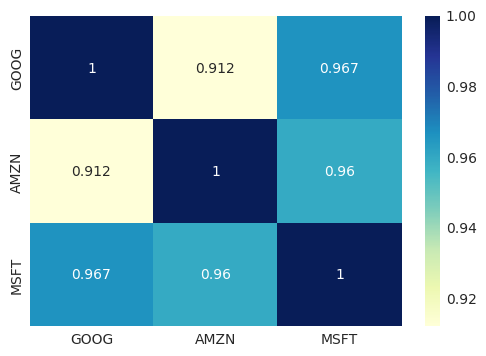

In [97]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(ret_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [98]:

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame# Let's  
rets = tech_returns.dropna()

In [99]:
rets.head()

,GOOG,AMZN,MSFT
Date,,,
2016-05-11,-0.010910,0.014451,0.000588
2016-05-12,-0.002768,0.006590,0.009011
2016-05-13,-0.003477,-0.011157,-0.008348
2016-05-16,0.007962,0.001042,0.014683
2016-05-17,-0.014320,-0.021656,-0.025468


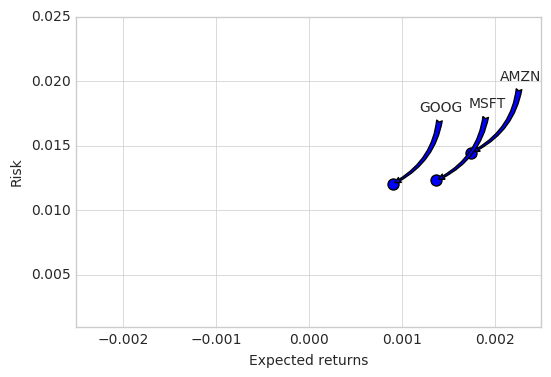

In [100]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

In [101]:
rets.head()

,GOOG,AMZN,MSFT
Date,,,
2016-05-11,-0.010910,0.014451,0.000588
2016-05-12,-0.002768,0.006590,0.009011
2016-05-13,-0.003477,-0.011157,-0.008348
2016-05-16,0.007962,0.001042,0.014683
2016-05-17,-0.014320,-0.021656,-0.025468


In [102]:

# Set up our time horizon# Set up 
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOG']

In [103]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price